In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [ ]:
#Menu selection
def menu():
    print("Welcome to the Data Scientist Earnings Analysis Program.")
    print("Begin by uploading your dataset using option 1.")
    print("Input your dataset name as 'dataset.csv' with the .csv extention")
    print()
    print("Data Loading:")
    print("1. Load dataset")
    print()
    print("2. Display top 5 rows of dataset")
    print()
    print("Data Exploration:")
    print("3.1 Summary of the dataset")
    print("3.2 Explore numerical and categorical columns and missing values")
    print("3.3 Explore insights based on the summary statistics for numerical columns")
    print("3.4 Explore unique job titles")
    print("3.5 Explore amount of different countries available.")
    print()
    print("Data Wrangling: ")
    print("Please run this after Data Exploration section and before Data Processing section")
    print("4 Add service_years column")
    print()
    print("Data Processing and Analysis:")
    print("5.1 The differences in salaries across countries")
    print("5.2 The typical income for a data scientist")
    print("5.3 Pay change as experience increases")
    print("5.4 Job roles which command the top earnings")
    print("5.5 Summary of average salary in USD by country")
    print("5.6 Number of service years and salary in local currency")
    print("5.7 Number of service years and salary after converting to USD")
    print("5.8 Salary in local currency and salary after converting to USD")
    print("5.9 Number of service years and portion of time the data scientist spends working remotely")
    print("5.10 Salary after converting to USD and portion of time the data scientist spends working remotely")
    
    
    print()
    print("Q Quit")
    print()
    print("M Menu")
    print()
    selection=input("Your selection: ")
    return selection

In [ ]:
#Selection 1 - read file from user input
def read_new_file():
    # Ask user to enter the filename
    file_name=input("Please enter your file name: ")
    print()
    
    # Read filename by user and load the data in the file
    read_file=pd.read_csv(file_name)
    data=pd.DataFrame(read_file)
    
    # Show file is successfully loaded
    print(file_name," is successfully loaded!")
    print()
    return data

In [ ]:
#Selection 2 - show top 5 rows of the dataset
def show_data(data):
    print()
    pd.set_option('display.max_rows', 5)
    pd.set_option('display.max_columns', None)
    print("Top 5 rows of dataset: ")
    display(data.head())
    print()

In [ ]:
#Selection 3.1 - show the summary information of dataset
def data_info(data):
    #Display the summary of dataset information
    print()
    print("Summary information of the dataset: ")
    display(data.info())

In [ ]:
# Selection 3.2 Numerical, Categorical columns and missing values
# Task a) i)
def num_cat_and_null(data):
    print()
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    
    # Numerical columns
    numerical=data.select_dtypes('number').columns.to_list()
    # Categorical columns
    categorical=data.select_dtypes('object').columns.to_list()
    print("Numerical:") 
    print(numerical)
    print()
    print("Categorical:")
    print(categorical)
    print()

    # Number of null values in each column
    print("Null values:")
    print(data.isnull().sum())
    print()
    print("Analysis: ")
    print("According to the result shown in the dataframe information, there are four numerical columns:")
    print("- work_year\n- salary\n- salary_in_usd\n- remote_ratio\n")
    print("These columns have a 'int64' data type. The remaining columns are categorical columns,")
    print("as they have an 'object' data type.")
    print("From the result, the 0 in each column shows that there are no null values in each column,")
    print("indicating that there are no null values in the dataset.")
    print()


In [ ]:
# Selection 3.3 Insights on numerical columns
# Task a) ii)
def numeric_insights(data):
    print()
    print("Numerical columns: ")
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    display(data.describe())
    print()
    print("Analysis: ")
    print("For the 'work_year' column:")
    print("- The dataset spans from 2020 to 2023.")
    print("- Most data points appear to be from 2022, with a mean work year around 2022.37.")
    print("- The low standard deviation (0.69) suggests that most data points are clustered around the mean (Year 2022), making it well-represented in the dataset.")

    print("\nThe 'salary' column:")
    print("- Contains a wide range of values, with a minimum salary of 6,000 and a maximum salary of 30,400,000.")
    print("- The mean salary is approximately 190,695, but the standard deviation is relatively high (671,676.5), suggesting significant salary variation due to different currencies.")

    print("\nThe 'salary_in_usd' column:")
    print("- Follows a similar pattern with a mean of approximately $137,570.39.")
    print("- The 25th percentile (Q1) salary is $100,000, the median (50th percentile or Q2) salary is $138,000, and the 75th percentile (Q3) salary is $180,000.")

    print("\nThe 'remote_ratio' column:")
    print("- Appears to represent the percentage of remote work.")
    print("- The mean remote ratio is approximately 46.27%, indicating significant remote work involvement.")
    print("- The data ranges from 0% (no remote work) to 100% (fully remote).")
    print()


In [ ]:
# Selection 3.4 - Unique job titles
# Task a) iii)
def job_titles(data):
    print()
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    print("Job titles:")
    print(data['job_title'].value_counts())
    print()
    print("Analysis: ")
    print("There are 93 unique job titles in the dataset.")
    print("The top 5 job titles with the most values are:")
    print("- Data Engineer")
    print("- Data Scientist")
    print("- Data Analyst")
    print("- Machine Learning Engineer")
    print("- Analytics Engineer")
    print()

In [ ]:
# Selection 3.5 - Amount of different countries
# Task a) iv)
def different_countries(data):
    print()
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    print("Different Countries:")
    print(data['company_location'].unique())
    print()
    print("Analysis: ")
    print("Total amount of different countries: ", data['company_location'].nunique())
    print("There are 72 unique countries in the dataset.")
    print("The top 5 countries with the most values are:")
    print("- United States (US)")
    print("- Great Britain (GB)")
    print("- Canada (CA)")
    print("- Spain (ES)")
    print("- India (IN)")


In [ ]:
# Selection 5.1 
# Task b) 
# i) differences in salaries across countries
# Calculate the average salary of each country
def country_sal_dif(data):
    salary_by_country = data.groupby('employee_residence')['salary'].mean()

    # Sort average salary in descending order
    salary_by_country = salary_by_country.sort_values(ascending=False)

    # Create a bar chart of the average salary by country using seaborn
    plt.figure(figsize=(12, 8))
    sns.barplot(x=salary_by_country.index, y=salary_by_country.values, palette='tab10')
    plt.xticks(rotation=90)
    plt.xlabel('Country')
    plt.ylabel('Average Salary')
    plt.title('Average Salary by Country for Data Scientists')
    plt.show()
    print(salary_by_country)
    print()
    print(data[data['employee_residence'] == 'CL'])
    print()
    print('Analysis: ')
    print("From this chart, we can tell that:")
    print("Country Chile (CL) has the highest average salary")
    print("figure among all countries, which is 15,252,500.")
    print("Hungary (HU) has the second-highest average salary figure, 9,533,333.")
    print("Japan (JP), India (IN), and Israel (IL) have average salary ")
    print("figures of 2,927,429, 1,684,775, and 1,500,000, respectively.")
    print("When we look into the data rows from Chile (CL), the first row of data has a salary of 30,400,000")
    print("which is considered very big. However, it is in Chilean Peso.")
    print("After converting it to USD, it is only 34,352 USD.")
    print("Thus, we can conclude that there are significant differences between the average salaries")
    print("of different countries because the salaries are in different currencies.")


In [ ]:
# Selection 5.2
# Task b) ii) Typical income for a data scientist
def typical_income(data):
    average_salary = data[data['job_title'] == 'Data Scientist']['salary_in_usd'].mean()

    # Create a bar chart using Seaborn
    plt.figure(figsize=(6, 6))
    sns.barplot(x=["Average Salary"], y=[average_salary], palette="Blues")

    # Set labels for the x and y axes
    plt.ylabel("Average Salary (USD)")

    # Set the title of the chart
    plt.title("Average Salary for Data Scientist")

    # Add the value of the mean salary on top of the bar
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f"{average_salary:.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

    # Show the bar chart
    plt.tight_layout()
    plt.show()

    print()
    print("Analysis: ")
    print("To explore the average income of data scientists, we performed the following steps:")
    print("1. Grouped the data that has the job title 'Data Scientist'.")
    print("2. Calculated the mean salary in USD for this group.")
    print("The result is 140,869 USD, indicating that the typical salary")
    print("for a data scientist worldwide is 140,869 USD per year.")



In [ ]:
# Selection 5.3
# Task b) iii)
def pay_change_experience(data):
    # Define the order of experience levels
    experience_order = ['EN', 'MI', 'SE', 'EX']

    # Create a boxplot using Seaborn
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='experience_level', y='salary_in_usd', order=experience_order, palette='tab10')

    # Set labels for the axes
    plt.xlabel("Experience Level")
    plt.ylabel("Salary in USD")

    # Set the title of the chart
    plt.title("Salary Change by Experience Level")

    # Show the boxplot
    plt.show()

    print()
    print('Analysis: ')
    print("In the dataset, there are four distinct experience levels:")
    print("1. Entry Level (EN)")
    print("2. Mid Level (MI)")
    print("3. Senior Level (SE)")
    print("4. Executive Level (EX)")

    print("From the boxplot displayed in the graph, we can observe the following trend:")
    print("- As the experience level increases, the salary in USD also increases.")
    print("- This suggests that individuals with more experience tend to earn higher salaries.")
    print()


In [ ]:
# Selection 5.4
# Task b) iv)
# Find the top 10 job titles with the highest earnings
def job_top_earn(data):
    top_10_jobs = data.groupby('job_title')['salary_in_usd'].mean().nlargest(10)

    # Create a bar chart using Seaborn
    plt.figure(figsize=(12, 6))
    sns.set_palette("viridis")
    ax = sns.barplot(x=top_10_jobs.index, y=top_10_jobs.values)

    # Add values on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

    # Set labels for the x and y axes
    plt.xlabel("Job Title")
    plt.ylabel("Average Salary in USD")

    # Set the title of the chart
    plt.title("Top 10 Job Titles with Highest Earnings")

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Show the bar chart
    plt.tight_layout()
    plt.show()

    print()
    print("Analysis: ")
    print("In the dataset, there's a diverse range of job titles.")
    print("To simplify our analysis, we focused on the top 10 job titles")
    print("that have the highest average salaries.")
    print("From the graph, we can observe that the following job titles")
    print("earn the highest average salaries:")
    print("1. Data Science Tech Lead")
    print("2. Cloud Data Architect")
    print("3. Data Lead")
    print("4. Data Analytics Lead")
    print("5. Principal Data Scientist")
    print("Among these, the job title 'Data Science Tech Lead'")
    print("stands out with the highest average salary of $375,000 per year.")
    print("It's noteworthy that the top 5 job titles with the ")
    print("highest salaries are all in leadership or senior positions.")


In [ ]:
# Selection 5.5
# Task b) v) summary of average salary in USD by country
# Calculate the average salary of each country
def country_usd_dif(data):
    salary_by_country = data.groupby('employee_residence')['salary_in_usd'].mean()

    # Sort average salary in descending order
    salary_by_country = salary_by_country.sort_values(ascending=False)

    # Create a bar chart of the average salary by country using seaborn
    plt.figure(figsize=(12, 8))
    sns.barplot(x=salary_by_country.index, y=salary_by_country.values, palette='tab10')
    plt.xticks(rotation=90)
    plt.xlabel('Country')
    plt.ylabel('Average Salary (USD)')
    plt.title('Average Salary by Country for Data Scientists')
    plt.show()
    print()
    print(salary_by_country)
    print("Israel rows: ")
    print(print(data[data['employee_residence'] == 'IL']))
    print()
    print("Analysis: ")
    print("From this graph, we can observe the top 5 countries with ")
    print("the highest salaries (in USD) for data scientists:")
    print("1. Israel (IL)")
    print("2. Malaysia (MY)")
    print("3. Puerto Rico (PR)")
    print("4. United States (US)")
    print("5. Canada (CA)")
    print("However, it's important to note that the average salary for Israel")
    print("might not be accurate due to the limited data; there's only one data row from Israel.")
    

In [ ]:
# Selection 4 Add service_years Column 
# Create a mapping of work_year to service_years
def add_service_years(data):
    year_mapping = {2020: 4, 2021: 3, 2022: 2, 2023: 1}

    # Use the map function to create the 'service_years' column
    data['service_years'] = data['work_year'].map(year_mapping)
    print()
    print("service_years column is added to dataset!")

In [ ]:
# Selection 5.6
# Task c) i)
def corr_years_salary(data):
    sns.heatmap(data[['service_years', 'salary']].corr(),cmap='RdBu',center=0,vmin=-1,vmax=1,annot=True)
    plt.show()
    print()
    print("Analysis: ")
    print("Before we perform the correlation analysis, we add a new column called 'service_years' in the data set.")
    print("This new column maps data from the 'work_year' column, so '2020, 2021, 2022, 2023' in 'work_year' becomes '4, 3, 2, 1' respectively in 'service_years'.")
    print("In this correlation heatmap, we observe a weak positive correlation (0.095) between 'salary' and 'service_years'.")
    print("This indicates that as the number of service years increases, salary tends to increase.")


In [ ]:
# Selection 5.7
# Task c) ii)
def corr_years_usd(data):
    sns.heatmap(data[['service_years', 'salary_in_usd']].corr(),cmap='RdBu',center=0,vmin=-1,vmax=1,annot=True)
    plt.show()
    print()
    print("Analysis: ")
    print("Analyzing the correlation heatmap,")
    print("we observe a slight negative correlation (-0.23) between 'service_years' and 'salary_in_usd'.")
    print("This negative correlation suggests that as 'service_years' increase,")
    print("the 'salary_in_usd' tends to decrease.")


In [ ]:
# Selection 5.8
# Task c) iii)
def corr_sal_usd(data):
    sns.heatmap(data[['salary', 'salary_in_usd']].corr(),cmap='RdBu',center=0,vmin=-1,vmax=1,annot=True)
    plt.show()
    print()
    print("Analysis: ")
    print("Analyzing the correlation heatmap,")
    print("we observe that 'salary' is weakly, negatively (-0.024) correlated to 'salary_in_usd',")
    print("which means that as 'salary' increases,")
    print("'salary_in_usd' tends to decrease.")


In [ ]:
# Selection 5.9
# Task c) iv)
def corr_years_remote(data):
    sns.heatmap(data[['service_years', 'remote_ratio']].corr(),cmap='RdBu',center=0,vmin=-1,vmax=1,annot=True)
    plt.show()
    print()
    print("Analysis: ")
    print("From the corrlation heatmap,")
    print("we can tell there's a slight positive correlation (0.24) between service_years and remote_ratio")
    print("which means if service_years increases, remote_ratio increases")
    print("showing that experienced data scientists prefer work at home")

In [ ]:
# Selection 5.10
# Task c) v)
def corr_usd_remote(data):
    sns.heatmap(data[['salary_in_usd', 'remote_ratio']].corr(),cmap='RdBu',center=0,vmin=-1,vmax=1,annot=True)
    plt.show()
    print()
    print("Analysis: ")
    print("According to the correlation heatmap,")
    print("we observe that salary_in_usd has a weak ")
    print("negative correlation with remote_ratio")
    print("As remote_ratio increases, salary_in_usd decreases")
    print("Showing that work from home might get less paid")


Welcome to the Data Scientist Earnings Analysis Program.
Begin by uploading your dataset using option 1.
Input your dataset name as 'dataset.csv' with the .csv extention

Data Loading:
1. Load dataset

2. Display top 5 rows of dataset

Data Exploration:
3.1 Summary of the dataset
3.2 Explore numerical and categorical columns and missing values
3.3 Explore insights based on the summary statistics for numerical columns
3.4 Explore unique job titles
3.5 Explore amount of different countries available.

Data Wrangling: 
Please run this after Data Exploration section and before Data Processing section
4 Add service_years column

Data Processing and Analysis:
5.1 The differences in salaries across countries
5.2 The typical income for a data scientist
5.3 Pay change as experience increases
5.4 Job roles which command the top earnings
5.5 Summary of average salary in USD by country
5.6 Number of service years and salary in local currency
5.7 Number of service years and salary after converting 

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M




Summary information of the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


None


Numerical:
['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

Categorical:
['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

Null values:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Analysis: 
According to the result shown in the dataframe information, there are four numerical columns:
- work_year
- salary
- salary_in_usd
- remote_ratio

These columns have a 'int64' data type. The remaining columns are categorical columns,
as they have an 'object' data type.
From the result, the 0 in each column shows that there are no null values in each column,
indicating that there are no null values in the dataset.


Numerical:
['work_year', 'salary', 'salary_in_usd', 'remote_ratio

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000



Analysis: 
For the 'work_year' column:
- The dataset spans from 2020 to 2023.
- Most data points appear to be from 2022, with a mean work year around 2022.37.
- The low standard deviation (0.69) suggests that most data points are clustered around the mean (Year 2022), making it well-represented in the dataset.

The 'salary' column:
- Contains a wide range of values, with a minimum salary of 6,000 and a maximum salary of 30,400,000.
- The mean salary is approximately 190,695, but the standard deviation is relatively high (671,676.5), suggesting significant salary variation due to different currencies.

The 'salary_in_usd' column:
- Follows a similar pattern with a mean of approximately $137,570.39.
- The 25th percentile (Q1) salary is $100,000, the median (50th percentile or Q2) salary is $138,000, and the 75th percentile (Q3) salary is $180,000.

The 'remote_ratio' column:
- Appears to represent the percentage of remote work.
- The mean remote ratio is approximately 46.27%, indicating

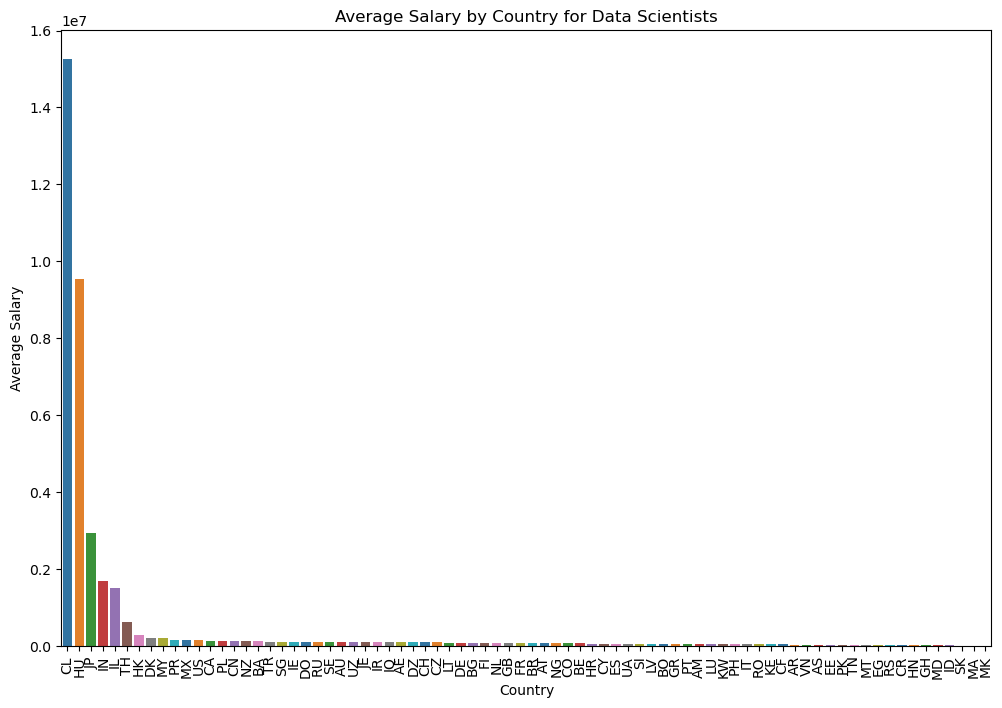

employee_residence
CL    1.525250e+07
HU    9.533333e+06
JP    2.927429e+06
IN    1.684775e+06
IL    1.500000e+06
TH    6.183333e+05
HK    2.790000e+05
DK    2.000000e+05
MY    2.000000e+05
PR    1.660000e+05
MX    1.610000e+05
US    1.528220e+05
CA    1.402824e+05
PL    1.360000e+05
CN    1.254040e+05
NZ    1.250000e+05
BA    1.200000e+05
TR    1.146000e+05
SG    1.120000e+05
IE    1.105714e+05
DO    1.100000e+05
RU    1.057500e+05
SE    1.050000e+05
AU    1.038182e+05
UZ    1.030000e+05
JE    1.000000e+05
IR    1.000000e+05
IQ    1.000000e+05
AE    1.000000e+05
DZ    1.000000e+05
CH    9.525000e+04
CZ    9.499950e+04
LT    9.024000e+04
DE    8.702540e+04
BG    8.000000e+04
FI    8.000000e+04
NL    7.389333e+04
GB    7.202478e+04
FR    6.959526e+04
BR    6.665000e+04
AT    6.583333e+04
NG    6.500000e+04
CO    6.496100e+04
BE    6.490000e+04
HR    6.333333e+04
CY    5.900000e+04
ES    5.786325e+04
UA    5.785000e+04
SI    5.575000e+04
LV    5.400000e+04
BO    5.250000e+04
GR    5.1125

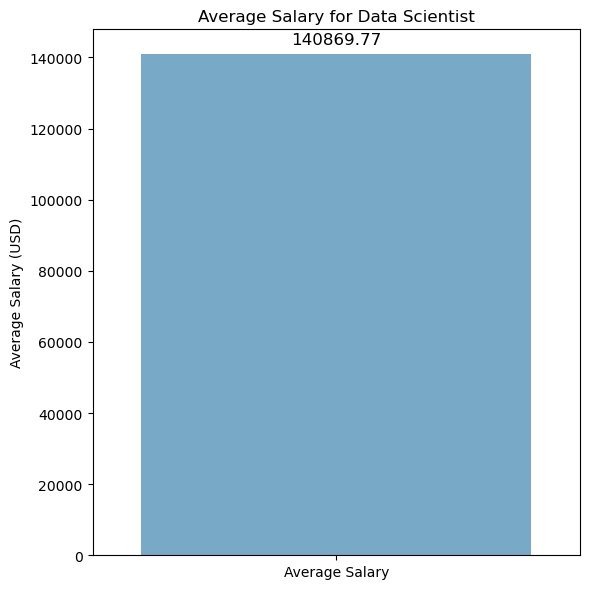


Analysis: 
To explore the average income of data scientists, we performed the following steps:
1. Grouped the data that has the job title 'Data Scientist'.
2. Calculated the mean salary in USD for this group.
The result is 140,869 USD, indicating that the typical salary
for a data scientist worldwide is 140,869 USD per year.


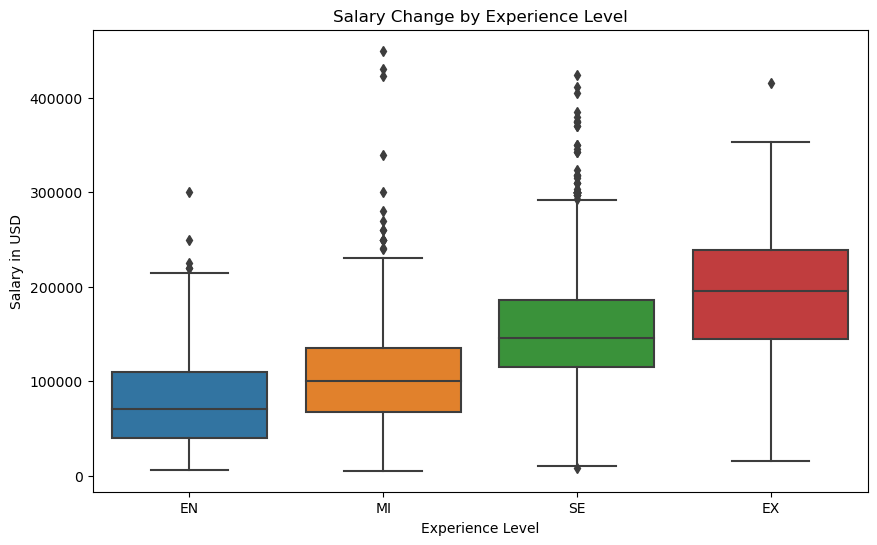


Analysis: 
In the dataset, there are four distinct experience levels:
1. Entry Level (EN)
2. Mid Level (MI)
3. Senior Level (SE)
4. Executive Level (EX)
From the boxplot displayed in the graph, we can observe the following trend:
- As the experience level increases, the salary in USD also increases.
- This suggests that individuals with more experience tend to earn higher salaries.



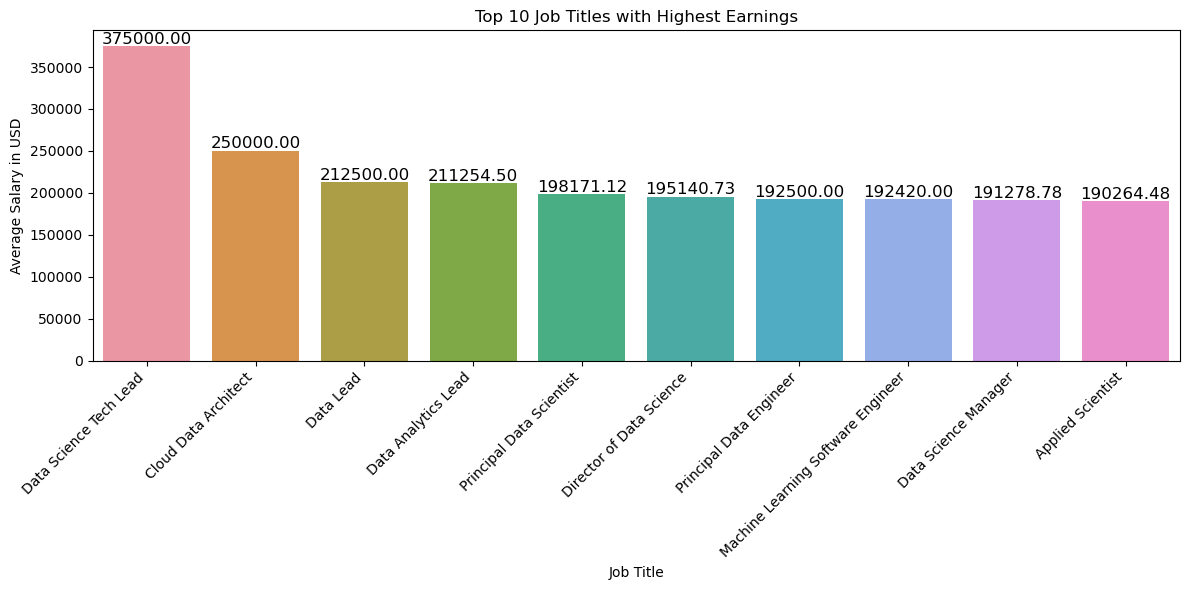


Analysis: 
In the dataset, there's a diverse range of job titles.
To simplify our analysis, we focused on the top 10 job titles
that have the highest average salaries.
From the graph, we can observe that the following job titles
earn the highest average salaries:
1. Data Science Tech Lead
2. Cloud Data Architect
3. Data Lead
4. Data Analytics Lead
5. Principal Data Scientist
Among these, the job title 'Data Science Tech Lead'
stands out with the highest average salary of $375,000 per year.
It's noteworthy that the top 5 job titles with the 
highest salaries are all in leadership or senior positions.

service_years column is added to dataset!


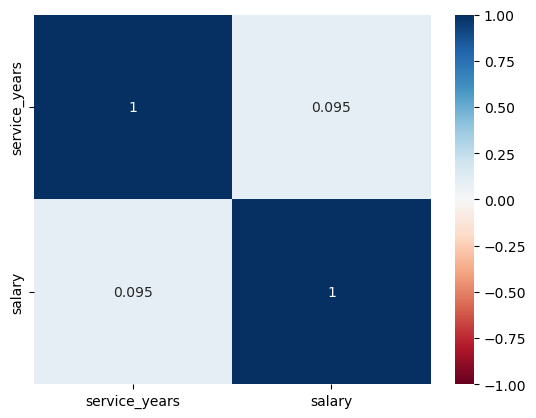


Analysis: 
Before we perform the correlation analysis, we add a new column called 'service_years' in the data set.
This new column maps data from the 'work_year' column, so '2020, 2021, 2022, 2023' in 'work_year' becomes '4, 3, 2, 1' respectively in 'service_years'.
In this correlation heatmap, we observe a weak positive correlation (0.095) between 'salary' and 'service_years'.
This indicates that as the number of service years increases, salary tends to increase.


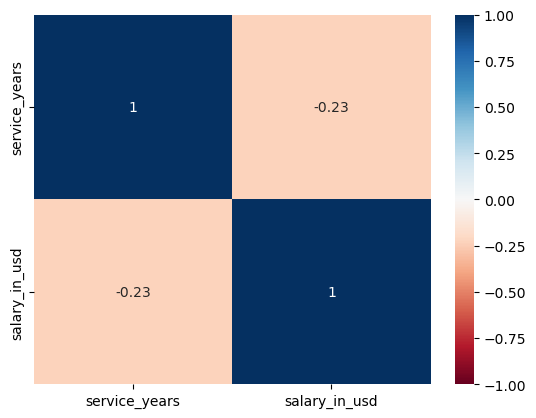


Analysis: 
Analyzing the correlation heatmap,
we observe a slight negative correlation (-0.23) between 'service_years' and 'salary_in_usd'.
This negative correlation suggests that as 'service_years' increase,
the 'salary_in_usd' tends to decrease.


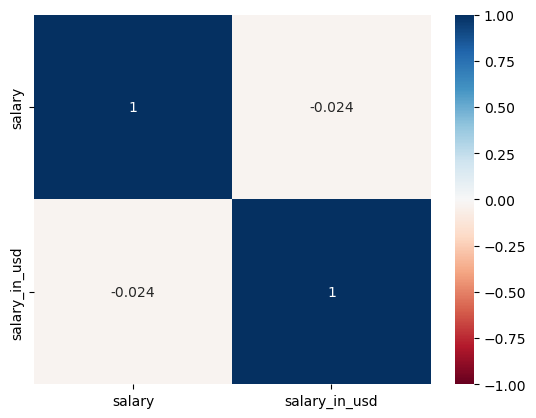


Analysis: 
Analyzing the correlation heatmap,
we observe that 'salary' is weakly, negatively (-0.024) correlated to 'salary_in_usd',
which means that as 'salary' increases,
'salary_in_usd' tends to decrease.


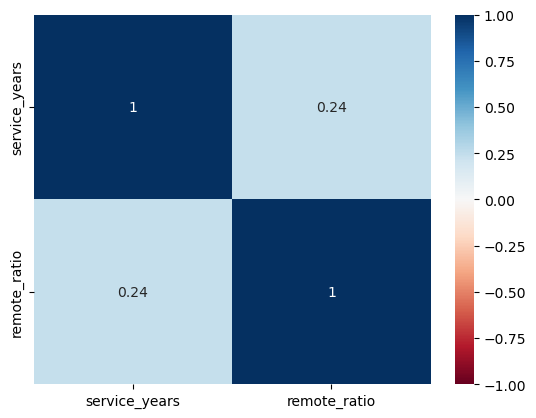


Analysis: 
From the corrlation heatmap,
we can tell there's a slight positive correlation (0.24) between service_years and remote_ratio
which means if service_years increases, remote_ratio increases
showing that experienced data scientists prefer work at home


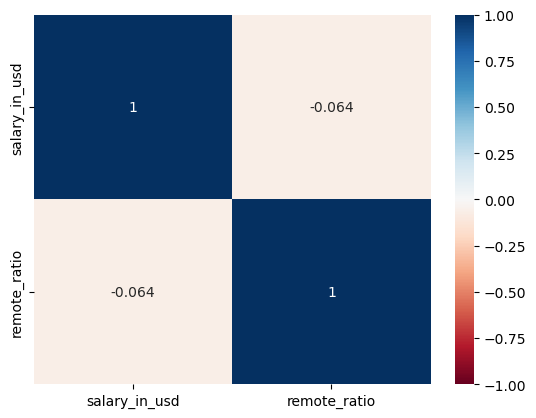


Analysis: 
According to the correlation heatmap,
we observe that salary_in_usd has a weak 
negative correlation with remote_ratio
As remote_ratio increases, salary_in_usd decreases
Showing that work from home might get less paid

Thank you for using this application!


In [140]:
# Task d)
#Main program
def main():
    selection=menu()
    while selection not in ['Quit','quit','Q','q']:
        if selection=='1':
            data=read_new_file()
            selection=input("Your selection: ")
        
        elif selection=='2':
            show_data(data)
            selection=input("Your selection: ")
        
        elif selection=='3.1':
            data_info(data)
            selection=input("Your selection: ")
    
        
        elif selection=='3.2':
            num_cat_and_null(data)
            selection=input("Your selection: ")
        
        elif selection=='3.3':
            numeric_insights(data)
            selection=input("Your selection: ")
        
        elif selection=='3.4':
            job_titles(data)
            selection=input("Your selection: ")

        elif selection=='3.5':
            different_countries(data)
            selection=input("Your selection: ")
        
        elif selection=='4':
            add_service_years(data)
            selection=input("Your selection: ")
        
        elif selection=='5.1':
            country_sal_dif(data)
            selection=input("Your selection: ")

        elif selection=='5.2':
            typical_income(data)
            selection=input("Your selection: ")

        elif selection=='5.3':
            pay_change_experience(data)
            selection=input("Your selection: ")

        elif selection=='5.4':
            job_top_earn(data)
            selection=input("Your selection: ")

        elif selection=='5.5':
            country_usd_dif(data)
            selection=input("Your selection: ")

        elif selection=='5.6':
            corr_years_salary(data)
            selection=input("Your selection: ")

        elif selection=='5.7':
            corr_years_usd(data)
            selection=input("Your selection: ")

        elif selection=='5.8':
            corr_sal_usd(data)
            selection=input("Your selection: ")
            
        elif selection=='5.9':
            corr_years_remote(data)
            selection=input("Your selection: ")

        elif selection=='5.10':
            corr_usd_remote(data)
            selection=input("Your selection: ")
        
        elif selection in ['Menu','menu','M','m']:
            menu()
            selection=input("Your selection: ")
            
        else:
            print()
            print("Please input valid selection")
            selection=input("Your selection:")
            print()

    print()  
    print("Thank you for using this application!")

main()